# IIT2019220
# DIVYATEZ SINGH SISODIYA

#Question 6
**Download the housing price data set of Windsor City of Canada ( provided on my website link). Design a housing price predictor taking only floor area (plot  size), number of bedrooms, and number of bathrooms into considerations. Out of total 546 data , you may take 70% for designing the predictor and 30% for validating the design. The predictor design should be done using the following methods:**


c) Design Predictor using 
# Batch Gradient Descent Algorithm, 
# Stochastic Gradient Algorithm 
# and mini batch Gradient Descent algorithms 
 (determining minibatch size is your choice- here it could be 10, 20, 30 etc.) with and without regularization and compare their performances in terms of % error in prediction.(only allowed to use the NumPy library of Python, no other functions/libraries are allowed) ( ref Lecture-10, 11 and 12)


In [110]:
import numpy as np
import pandas as pd
import math
from copy import deepcopy
import matplotlib.pyplot as plt

`Input from CSV in Github as instructed `


In [111]:
input_data = pd.read_csv('https://raw.githubusercontent.com/d3ad5h01/IML_IIITA/main/Housing%20Price%20data%20set.csv')

price = input_data['price']
area = input_data['lotsize']
bedrooms = input_data['bedrooms']
bathrooms = input_data['bathrms']



`Precompute area_mean as it will be used in scaling below
`



In [112]:
area_mean = np.mean(area)
area_max = max(area)
area_min = min(area)

` Algos like linear regression, logistic regression, etc. that use gradient descent as an optimization technique require data to be scaled. This is to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. `

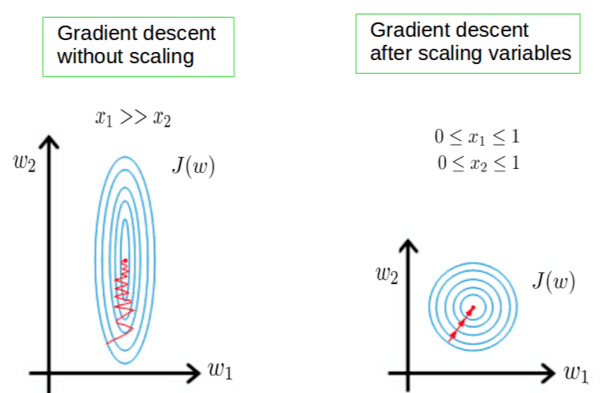

In [113]:
area_scaled = []
for i in area:
	area_scaled.append((i - area_mean) / (area_max - area_min))

`First get important features from columns and put it in train fearures , we will be using it in cost func value calculation , as it will be easy to pass`

In [114]:
train_features = []
for i in range(383):
	train_features.append([1, area_scaled[i], bedrooms[i], bathrooms[i]])


`Put values in test_features and test_price , so helpful in error calculation `

In [115]:
price_train = price[:383]
test_price = []
test_features = []
for i in range(383, len(price)):
	test_features.append([1, area_scaled[i], bedrooms[i], bathrooms[i]])
	test_price.append(price[i])
m = len(train_features)

`This gets `
# 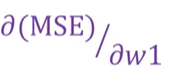

In [116]:
def Slope(coefficient, train_features, price_train, ind):
	err = 0
	for i in range(len(train_features)):
		itr = 0
		for j in range(len(coefficient)):
			itr = itr + coefficient[j] * train_features[i][j]
		err += (itr - price_train[i]) * train_features[i][ind]
	return err


`Lets try` 
# **Scaled batch gradient without regularisation**


`Defining variables used later`

In [117]:
learning_rate = 0.001
m = len(train_features)



```
Initialise all coeff with 0 ie w0, w1, w2, w3
```





In [118]:
coefficient = [0, 0, 0, 0]

`5000 is number of times coeff are updated`
*    `for i in range(5000):`

`So ie 5000 times , for every coeff`
* `for j in range(len(coefficient)):`

We do similar to follows:

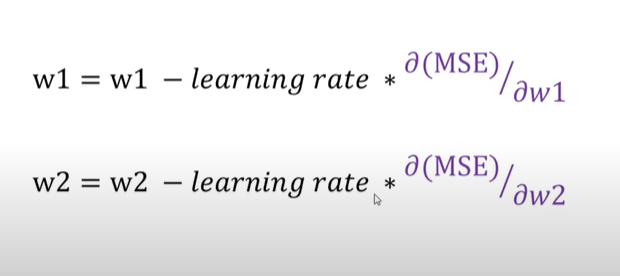


In [119]:
for i in range(5000):
	temp_coefficient = deepcopy(coefficient)
	for j in range(len(coefficient)):
		temp_coefficient[j] = temp_coefficient[j] - ((learning_rate / m) * (Slope(coefficient, train_features, price_train, j))) #derivative of j theta ya normal equation
	coefficient = deepcopy(temp_coefficient)
print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[7730.872053867435, 8069.264303687423, 11077.015405893277, 18485.569122447192]


`Calculating Mean absolute percentage error`

In [120]:
err = 0 # error calculation
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 90
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 18.30641888247704


# **Scaled batch gradient with regularisation**

`Defining variables used later`

In [122]:
learning_rate = 0.001
lambda_param = -49



```
Initialise all coeff with 0 ie w0, w1, w2, w3
```





In [123]:
coefficient = [0, 0, 0, 0]

`5000 is number of times coeff are updated`
*    `for epochs in range(5000):`

`So ie 5000 times , for every coeff`
* `for j in range(len(coefficient)):`

We do similar to follows:
2 conditions: 
1.   For first one we have no regularisation part
2.   For others , 

```
	temp_coefficient[j] = (1 - learning_rate * lambda_param / m) * temp_coefficient[j] - ((learning_rate / m) * (Slope(coefficient, train_features, price_train, j)))
```







In [124]:
for epochs in range(5000):
	temp_coefficient = deepcopy(coefficient)
	for j in range(len(coefficient)): # 2 condition , 1 wale mai regulariation nahi atta 0 mai beacuse uska value consta hai 1 hai
		if (j == 0):
			temp_coefficient[j] = temp_coefficient[j] - ((learning_rate / m) * (Slope(coefficient, train_features, price_train, j)))	
		else:
			temp_coefficient[j] = (1 - learning_rate * lambda_param / m) * temp_coefficient[j] - ((learning_rate / m) * (Slope(coefficient, train_features, price_train, j)))
	coefficient = deepcopy(temp_coefficient)
print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[5037.585668619078, 11147.667574879839, 10378.580439168689, 22647.298983883848]


`Calculating Mean absolute percentage error`

In [125]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 19.92701396456417


# **Scaled Stochastic gradient without regularisation**

`Similar to as mentioned previous `

In [148]:
def SlopeStoch(coefficient,train_features,ActualVal,ind):
	itr = 0
	for j in range(len(coefficient)):
		itr = itr + coefficient[j]*train_features[j]
	return (itr - ActualVal) * train_features[ind]

`Similar to as mentioned previous `

In [149]:
learning_rate = 0.005

In [150]:
coefficient = [0, 0, 0, 0]

`Similar to as mentioned previous `

In [151]:
for iter in range(10):
	for i in range(len(price_train)):
		temp_coefficient = deepcopy(coefficient)
		for j in range(4):
			temp_coefficient[j] = temp_coefficient[j] - (learning_rate * (SlopeStoch(coefficient, train_features[i], price_train[i], j)))
		coefficient = deepcopy(temp_coefficient)

print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[18648.663069990776, 15073.501985961251, 15766.862790309351, 22357.23427068568]


`Mean absolute percentage error`

In [152]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 32.87903970192347


# **Scaled Stochastic gradient with regularisation**

`Similar to as mentioned previous `

In [153]:
learning_rate = 0.005
lambda_param = 350

In [154]:
coefficient = [0, 0, 0, 0]

In [155]:
for iter in range(10):
	for i in range(len(price_train)):
		temp_coefficient = deepcopy(coefficient)
		for j in range(4):
			if j == 0:
			  temp_coefficient[j] = temp_coefficient[j] - (learning_rate * (SlopeStoch(coefficient, train_features[i], price_train[i], j)))
			else:
				temp_coefficient[j] = (1 - learning_rate * lambda_param) * temp_coefficient[j] - (learning_rate * (SlopeStoch(coefficient, train_features[i], price_train[i], j)))
		coefficient = deepcopy(temp_coefficient)

print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[70328.25365676756, 178.7945378046108, 188.44220557030144, 21.346006720907667]


`Mean absolute percentage error`

In [156]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 22.544107298831005


# **Scaled Minibatch gradient without regularisation for batch size = 25**

In [ ]:
size = 25;

In [ ]:
learning_rate = 0.002

In [ ]:
coefficient = [0, 0, 0, 0]

In [157]:
batches_num = math.ceil(len(price_train) / size)
divide_equal = False
if (len(price_train) % size == 0):
	divide_equal = True;

for epoch in range(30):
	for batch in range(batches_num):
		sum_ = [0, 0, 0, 0]
		for j in range(len(coefficient)):
			for i in range(size):
				if (batch * size + i == len(train_features)):
					break
				pred_val = 0.0
				for wj in range(len(coefficient)):
					pred_val += coefficient[wj] * train_features[batch * size + i][wj]
				pred_val -= price_train[batch * size + i]
				pred_val *= train_features[batch * size + i][j]
				sum_[j] += pred_val;

		if (not divide_equal and batch == batches_num - 1):
			for j in range(len(sum_)):
				coefficient[j] -= (sum_[j] / (len(price_train) % size)) * learning_rate
		else:
			for j in range(len(sum_)):
				coefficient[j] -= (sum_[j] / size) * learning_rate
print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[5945.780924793533, 1940.7195893111414, 16063.57050808333, 11037.882368320596]


`Mean absolute percentage err`

In [158]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 20.34290336445297


# **Scaled Minibatch gradient with regularisation for batch size = 25**

`Similar to as mentioned previous `

In [ ]:
size = 25;

In [ ]:
learning_rate = 0.002
lambda_param = -372

In [ ]:
coefficient = [0, 0, 0, 0]

In [159]:
batches_num = math.ceil(len(price_train) / size)
divide_equal = False
if (len(price_train) % size == 0):
	divide_equal = True;

for epoch in range(30):
	for batch in range(batches_num):
		sum_ = [0, 0, 0, 0]
		for j in range(len(coefficient)):
			for i in range(size):
				if (batch * size + i == len(train_features)):
					break
				pred_val = 0.0
				for wj in range(len(coefficient)):
					pred_val += coefficient[wj] * train_features[batch * size + i][wj]
				pred_val -= price_train[batch * size + i]
				pred_val *= train_features[batch * size + i][j]
				sum_[j] += pred_val;

		if (not divide_equal and batch == batches_num - 1):
			for j in range(len(sum_)):
				if j == 0:
					coefficient[j] -= (sum_[j] / (len(price_train) % size)) * learning_rate
				else:
					coefficient[j] = (1 - learning_rate * lambda_param / m) * coefficient[j] - (sum_[j] / (len(price_train) % size)) * learning_rate
		else:
			for j in range(len(sum_)):
				if j == 0:
					coefficient[j] -= (sum_[j] / size) * learning_rate
				else:
					coefficient[j] = (1 - learning_rate * lambda_param / m) * coefficient[j] - (sum_[j] / size) * learning_rate
print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[1747.2397187003373, 3134.447676234846, 17844.75481180281, 14307.380573314776]


`Mean absolute percentage error`

In [160]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 19.72984683085249


d) Implement the LWR algorithm on the Housing Price data set with different tau values.	Find out the tau value which will provide the best fit predictor and hence compare its results with a) , b) and c) above.								50


In [161]:
input_data = pd.read_csv('https://raw.githubusercontent.com/d3ad5h01/IML_IIITA/main/Housing%20Price%20data%20set.csv', usecols = ["price", "lotsize", "bedrooms", "bathrms"])
area = input_data['lotsize']
bedrooms = input_data['bedrooms']
bathrooms = input_data['bathrms']
y = input_data['price']
y = np.array(y)
y = y.reshape(y.shape[0], 1)

In [162]:
def error_calc(y, Y_pred):
    err = 0
    for i in range(len(y)):
        err += abs(y[i] - Y_pred[i]) / y[i]
    err = err / len(y)
    return err * 100
# weighted func in lwr
def get_kernal(x, xi, hp_tau):
    return np.exp(-np.sum((xi - x) ** 2, axis = 1) / (2 * hp_tau * hp_tau))
# lwr using normal equation
def LocallyWeightedLR(x, xi, y, hp_tau):
	x_t = np.transpose(x)
	W = get_kernal(x, xi, hp_tau) # weighted fund 
	x_t_w = x_t * W
	x_t_wx = np.matmul(x_t_w, x)
	ix_t_wx = np.linalg.pinv(x_t_wx)
	ix_t_wx_xtw = np.matmul(ix_t_wx, x_t_w)
	ix_t_wx_xtwy = np.matmul(ix_t_wx_xtw, y)
	ix_t_wx_xtwyt = np.transpose(ix_t_wx_xtwy)
	return ix_t_wx_xtwyt.dot(xi)

Performing feature scanning on area.

In [163]:
area_mean = np.mean(area)
area_max = max(area)
area_min = min(area)
area_scaled = []
for i in area:
	area_scaled.append((i - area_mean) / (area_max - area_min))

x = []
for i in range(len(area)):
	x.append([1, area_scaled[i], bedrooms[i], bathrooms[i]])
x = np.array(x)

hp_tau = 0.00005
print("Using Locally Weighted Linear Regression for Tau = " + str(hp_tau))
pred = []
for i in range(x.shape[0]):
	y_pred = LocallyWeightedLR(x, x[i], y, hp_tau)
	pred.append(y_pred)
print("Mean absolute percentage err is : " + str(error_calc(y,pred)))

Using Locally Weighted Linear Regression for Tau = 5e-05
Mean absolute percentage err is : [5.40732082]


Segmenting the features.

In [164]:
price = input_data['price']
train_features = []
for i in range(383):
	train_features.append([1, area_scaled[i], bedrooms[i], bathrooms[i]])
price_train = price[:383]
test_price = []
test_features = []
for i in range(383, len(price)):
	test_features.append([1, area_scaled[i], bedrooms[i], bathrooms[i]])
	test_price.append(price[i])
m = len(train_features)

# Function to calculate Slope to find coefficients
def Slope(coefficient, train_features, price_train, ind):
	err = 0
	for i in range(len(train_features)):
		itr = 0
		for j in range(len(coefficient)):
			itr = itr + coefficient[j] * train_features[i][j]
		err += (itr - price_train[i]) * train_features[i][ind]
	return err

Using scaled batch gradient with regularisation.

In [165]:
learning_rate = 0.001
lambda_param = -49
coefficient = [0, 0, 0, 0]
for epochs in range(5000):
	temp_coefficient = deepcopy(coefficient)
	for j in range(len(coefficient)):
		if (j == 0):
			temp_coefficient[j] = temp_coefficient[j] - ((learning_rate / m) * (Slope(coefficient, train_features, price_train, j)))	
		else:
			temp_coefficient[j] = (1 - learning_rate * lambda_param / m) * temp_coefficient[j] - ((learning_rate / m) * (Slope(coefficient, train_features, price_train, j)))
	coefficient = deepcopy(temp_coefficient)
print("Final coefficients are:")
print(coefficient)


Final coefficients are:
[5037.585668619078, 11147.667574879839, 10378.580439168689, 22647.298983883848]


Finding Mean absolute percentage error.

In [166]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 19.92701396456417


Using Scaled Stochastic gradient with regularisation.

In [167]:
def SlopeStoch(coefficient,train_features,ActualVal,ind):
	itr = 0
	for j in range(len(coefficient)):
		itr = itr + coefficient[j]*train_features[j]
	return (itr - ActualVal) * train_features[ind]

learning_rate = 0.004
lambda_param = 350
coefficient = [0, 0, 0, 0]

for iter in range(10):
	for i in range(len(price_train)):
		temp_coefficient = deepcopy(coefficient)
		for j in range(4):
			if j == 0:
				temp_coefficient[j] = temp_coefficient[j] - (learning_rate * (SlopeStoch(coefficient, train_features[i], price_train[i], j)))
			else:
				temp_coefficient[j] = (1 - learning_rate * lambda_param) * temp_coefficient[j] - (learning_rate * (SlopeStoch(coefficient, train_features[i], price_train[i], j)))
		coefficient = deepcopy(temp_coefficient)

print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[68960.29326112158, 153.64807034670707, 676.520317970872, 228.94386002036987]


In [168]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))
print()

Mean absolute percentage err is : 22.391965664113076



Using Scaled Minibatch gradient with regularisation for batch size = 20

In [169]:
batches_num = 20;
learning_rate = 0.002
lambda_param = -372
coefficient = [0, 0, 0, 0]
batches_num = math.ceil(len(price_train) / batches_num)
divide_equal = False
if (len(price_train) % batches_num == 0):
	divide_equal = True;

for epoch in range(30):
	for batch in range(batches_num):
		sum_ = [0, 0, 0, 0]
		for j in range(len(coefficient)):
			for i in range(batches_num):
				if (batch * batches_num + i == len(train_features)):
					break
				pred_val = 0.0
				for wj in range(len(coefficient)):
					pred_val += coefficient[wj] * train_features[batch * batches_num + i][wj]
				pred_val -= price_train[batch * batches_num + i]
				pred_val *= train_features[batch * batches_num + i][j]
				sum_[j] += pred_val;

		if (not divide_equal and batch == batches_num - 1):
			for j in range(len(sum_)):
				if j == 0:
					coefficient[j] -= (sum_[j] / (len(price_train) % batches_num)) * learning_rate
				else:
					coefficient[j] = (1 - learning_rate * lambda_param / m) * coefficient[j] - (sum_[j] / (len(price_train) % batches_num)) * learning_rate
		else:
			for j in range(len(sum_)):
				if j == 0:
					coefficient[j] -= (sum_[j] / batches_num) * learning_rate
				else:
					coefficient[j] = (1 - learning_rate * lambda_param / m) * coefficient[j] - (sum_[j] / batches_num) * learning_rate
print("Final coefficients are:")
print(coefficient)

Final coefficients are:
[888.9201243627547, 5168.211726125255, 17701.360814619125, 15202.387873756412]


Finding Mean absolute percentage err.

In [170]:
err = 0
for i in range(len(test_features)):
	predicted = 0
	for j in range(len(coefficient)):
	  	predicted = predicted + coefficient[j] * test_features[i][j]
	err += abs(predicted - test_price[i]) / test_price[i]
err = (err / len(test_features)) * 100
print("Mean absolute percentage err is : " + str(err))

Mean absolute percentage err is : 19.550681895981263
